# FiveThirtyEight Fandango Dataset

Whose ratings should you trust? IMDB, Rotten Tomatoes, Metacritic, or Fandango?

* [FiveThirtyEight Fandango Dataset](https://www.kaggle.com/datasets/fivethirtyeight/fivethirtyeight-fandango-dataset)
* [Be Suspicious Of Online Movie Ratings, Especially Fandango’s](https://fivethirtyeight.com/features/fandango-movies-ratings/)


## Dataset


In [2]:
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv -P dataset
!wget https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_scrape.csv -P dataset

--2023-05-17 11:34:36--  https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_score_comparison.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15144 (15K) [text/plain]
Saving to: ‘dataset/fandango_score_comparison.csv.1’

fandango_score_comp 100%[===================>]  14.79K  --.-KB/s    in 0.004s  

2023-05-17 11:34:36 (3.87 MB/s) - ‘dataset/fandango_score_comparison.csv.1’ saved [15144/15144]

--2023-05-17 11:34:36--  https://raw.githubusercontent.com/fivethirtyeight/data/master/fandango/fandango_scrape.csv
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 18

`fandango_score_comparison.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015:

| Column | Definition |
| -- | -- |
| FILM | The film in question |
| RottenTomatoes | The Rotten Tomatoes Tomatometer score for the film |
| RottenTomatoes_User | The Rotten Tomatoes user score for the film |
| Metacritic | The Metacritic critic score for the film |
| Metacritic_User | The Metacritic user score for the film |
| IMDB | The IMDb user score for the film |
| Fandango_Stars | The number of stars the film had on its Fandango movie page |
| Fandango_Ratingvalue | The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained. |
| RT_norm | The Rotten Tomatoes Tomatometer score for the film , normalized to a 0 to 5 point system |
| RT_user_norm | The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system |
| Metacritic_norm | The Metacritic critic score for the film, normalized to a 0 to 5 point system |
| Metacritic_user_nom | The Metacritic user score for the film, normalized to a 0 to 5 point system |
| IMDB_norm | The IMDb user score for the film, normalized to a 0 to 5 point system |
| RT_norm_round | The Rotten Tomatoes Tomatometer score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star |
| RT_user_norm_round | The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star |
| Metacritic_norm_round | The Metacritic critic score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star |
| Metacritic_user_norm_round | The Metacritic user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star |
| IMDB_norm_round | The IMDb user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star |
| Metacritic_user_vote_count | The number of user votes the film had on Metacritic |
| IMDB_user_vote_count | The number of user votes the film had on IMDb |
| Fandango_votes | The number of user votes the film had on Fandango |
| Fandango_Difference | The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue |

`fandango_scrape.csv` contains every film we pulled from Fandango:

| Column | Definiton |
| -- | -- |
| FILM | The movie |
| STARS | Number of stars presented on Fandango.com |
| RATING | The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained. |
| VOTES | number of people who had reviewed the film at the time we pulled it. |

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Exploration

### Fandango Displayed Star Scores vs User Ratings

In [2]:
fandango_df = pd.read_csv('dataset/fandango_scrape.csv')
fandango_df.head(5)

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


| | FILM | STARS | RATING | VOTES |
| -- | -- | -- | -- | -- |
| 0 | Fifty Shades of Grey (2015) | 4.0 | 3.9 | 34846 |
| 1 | Jurassic World (2015) | 4.5 | 4.5 | 34390 |
| 2 | American Sniper (2015) | 5.0 | 4.8 | 34085 |
| 3 | Furious 7 (2015) | 5.0 | 4.8 | 33538 |
| 4 | Inside Out (2015) | 4.5 | 4.5 | 15749 |

In [7]:
fandango_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    510 non-null    object 
 1   STARS   510 non-null    float64
 2   RATING  510 non-null    float64
 3   VOTES   510 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 16.1+ KB


`<class 'pandas.core.frame.DataFrame'>`

* RangeIndex: 510 entries, 0 to 509
* Data columns (total 4 columns):

| # | Column | Non-Null Count | Dtype |
| -- | -- | -- | -- |
|  0  | FILM | 510 non-null | object  |
|  1  | STARS | 510 non-null | float64 |
|  2  | RATING | 510 non-null | float64 |
|  3  | VOTES | 510 non-null | int64   |
_dtypes: float64(2), int64(1), object(1)_
_memory usage: 16.1+ KB_

In [8]:
fandango_df.describe()

,STARS,RATING,VOTES
count,510.000000,510.000000,510.000000
mean,3.532353,3.351765,1134.364706
std,1.585616,1.512628,3809.952176
min,0.000000,0.000000,0.000000
25%,3.500000,3.025000,2.000000
50%,4.000000,3.800000,17.500000
75%,4.500000,4.300000,183.500000
max,5.000000,5.000000,34846.000000


|  | STARS | RATING | VOTES |
| -- | -- | -- | -- |
| count | 510.000000 | 510.000000 | 510.000000 |
| mean | 3.532353 | 3.351765 | 1134.364706 |
| std | 1.585616 | 1.512628 | 3809.952176 |
| min | 0.000000 | 0.000000 | 0.000000 |
| 25% | 3.500000 | 3.025000 | 2.000000 |
| 50% | 4.000000 | 3.800000 | 17.500000 |
| 75% | 4.500000 | 4.300000 | 183.500000 |
| max | 5.000000 | 5.000000 | 34846.000000 |

In [122]:
sns.set(
    style='darkgrid',
    palette='winter'
)

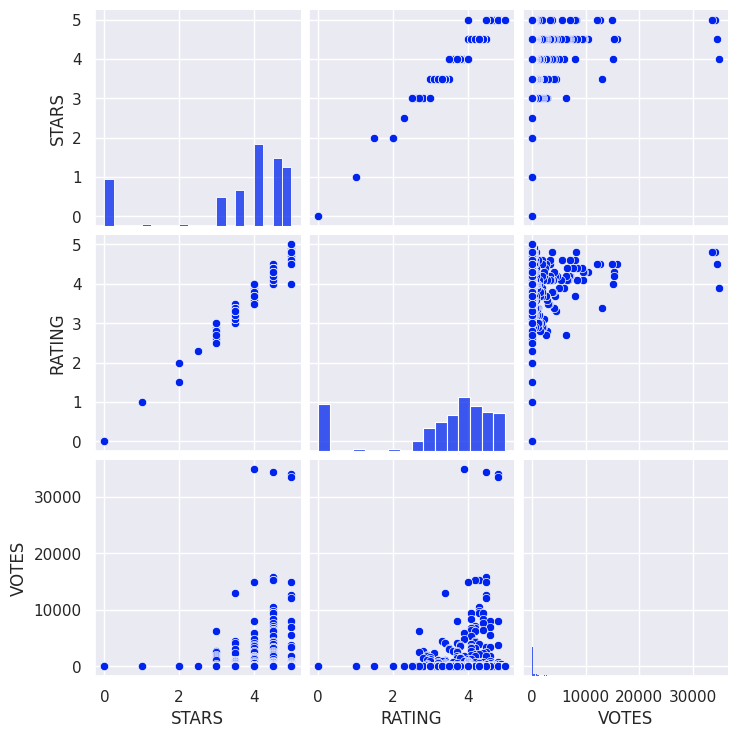

In [96]:
# Find Correlations between Stars, Ratings and Number of Votes
sns.pairplot(
    data=fandango_df
)

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_01.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_01.webp)

In [91]:
# how do the columns correlate
fandango_df.corr(numeric_only=True)
# there is a small difference between stars and user ratings

,STARS,RATING,VOTES
STARS,1.000000,0.994870,0.165774
RATING,0.994870,1.000000,0.165147
VOTES,0.165774,0.165147,1.000000


|  | STARS | RATING | VOTES |
| -- | -- | -- | -- |
| STARS | 1.000000 | 0.994870 | 0.165774 |
| RATING | 0.994870 | 1.000000 | 0.165147 |
| VOTES | 0.165774 | 0.165147 | 1.000000 |

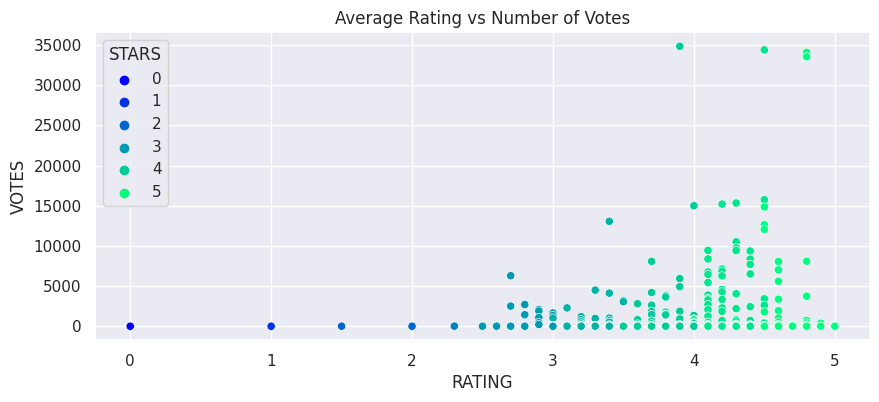

In [98]:
plt.figure(figsize=(10, 4))

sns.scatterplot(
    data=fandango_df,
    x='RATING',
    y='VOTES',
    hue='STARS',
    palette='winter',
    # size='training level'
).set_title('Average Rating vs Number of Votes')

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_02.webp', bbox_inches='tight')


![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_02.webp)

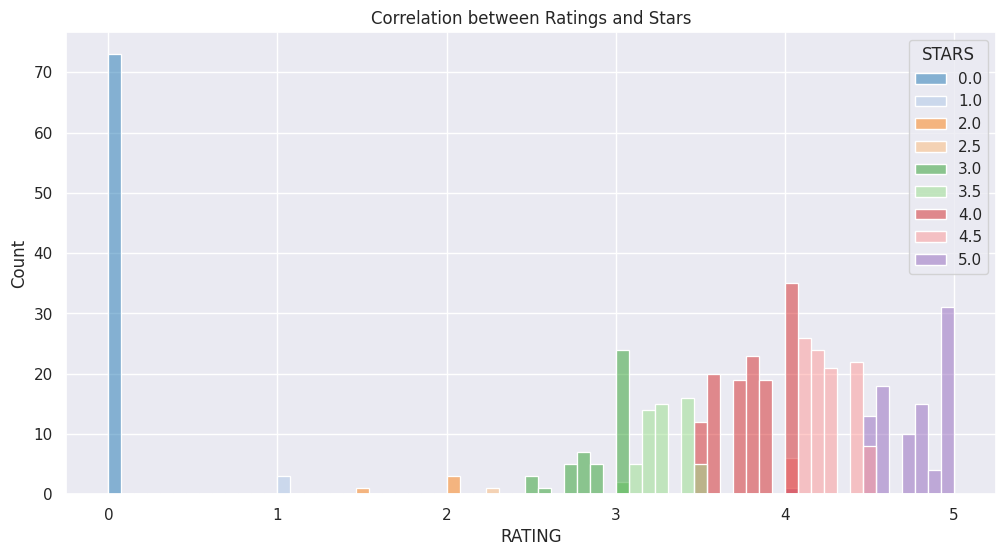

In [20]:
plt.figure(figsize=(12, 6))
plt.title('Correlation between Ratings and Stars')

sns.histplot(
    data=fandango_df,
    x='RATING',
    bins=65,
    hue='STARS',
    palette='tab20',
    kde=False
)

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_03.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_03.webp)

In [3]:
# add YEAR column
fandango_df['YEAR'] = fandango_df['FILM'].apply(
    lambda x: x.replace('"','')
).apply(
    lambda x: x.replace('(1)', '(0000)')
).apply(
    lambda x: x[-5:-1]
)

fandango_df['YEAR'].tail(5)

505    2015
506    2015
507    2015
508    1964
509    0000
Name: YEAR, dtype: object

| | |
| -- | -- |
| 505 | 2015 |
| 506 | 2015 |
| 507 | 2015 |
| 508 | 1964 |
| 509 | 0000 |
_Name: YEAR, dtype: object_

In [61]:
fandango_df['YEAR'].value_counts()

2015    478
2014     23
0000      7
2016      1
1964      1
Name: YEAR, dtype: int64

| | |
| -- | -- |
| 2015 | 478 |
| 2014 | 23 |
| 0000 | 7 |
| 2016 | 1 |
| 1964 | 1 |
_Name: YEAR, dtype: int64_

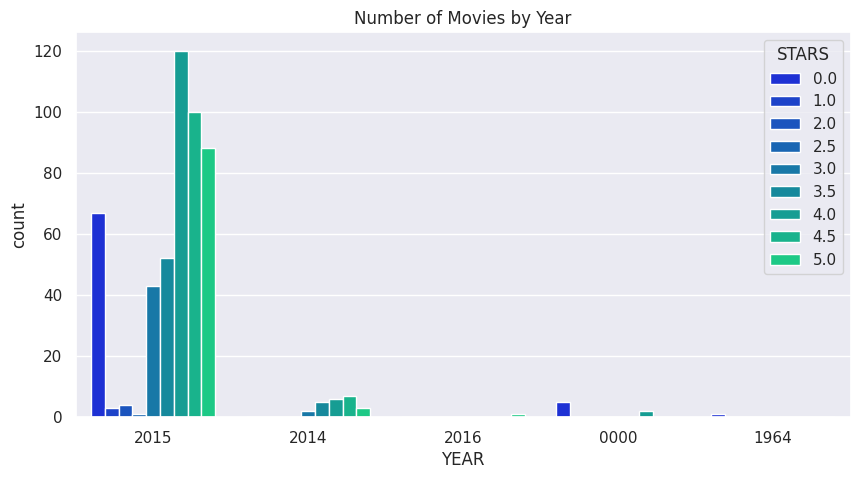

In [98]:
plt.figure(figsize=(10, 5))
plt.title('Number of Movies by Year')

sns.countplot(
    data=fandango_df,
    x='YEAR',
    hue='STARS',
    palette='winter'
)

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_04.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_04.webp)

In [43]:
fandango_years_df = fandango_df.groupby(['YEAR'])
temp_df = fandango_years_df.mean(numeric_only=True).round(1).reset_index()
temp_df.head(5)

,YEAR,STARS,RATING,VOTES
0,0000,1.1,1.1,0.4
1,1964,0.0,0.0,0.0
2,2014,4.1,3.8,3341.4
3,2015,3.5,3.4,1049.5
4,2016,5.0,4.7,11.0


| | YEAR | STARS | RATING | VOTES |
| -- | -- | -- | -- | -- |
| 0 | 0000 | 1.1 | 1.1 | 0.4 |
| 1 | 1964 | 0.0 | 0.0 | 0.0 |
| 2 | 2014 | 4.1 | 3.8 | 3341.4 |
| 3 | 2015 | 3.5 | 3.4 | 1049.5 |
| 4 | 2016 | 5.0 | 4.7 | 11.0 |

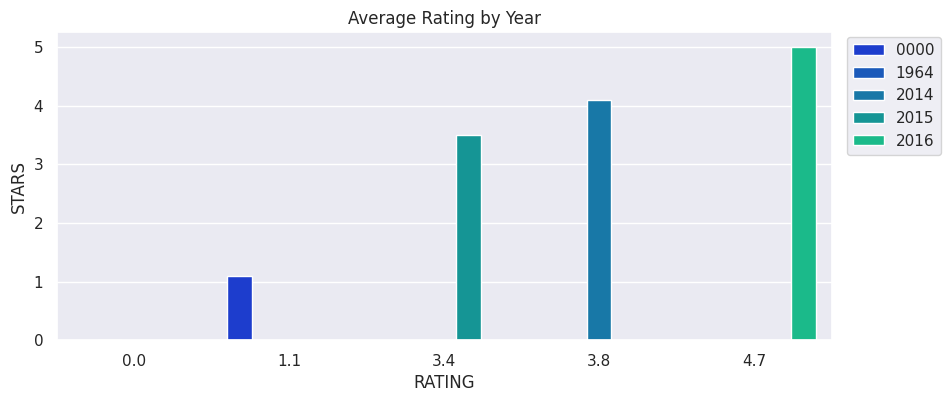

In [44]:
plt.figure(figsize=(10, 4))
plt.title('Average Rating by Year')

plot = sns.barplot(x='RATING', y='STARS' , data=temp_df, palette='winter', hue='YEAR' )

plt.legend(bbox_to_anchor=(1.01,1.01))
plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_05.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_05.webp)

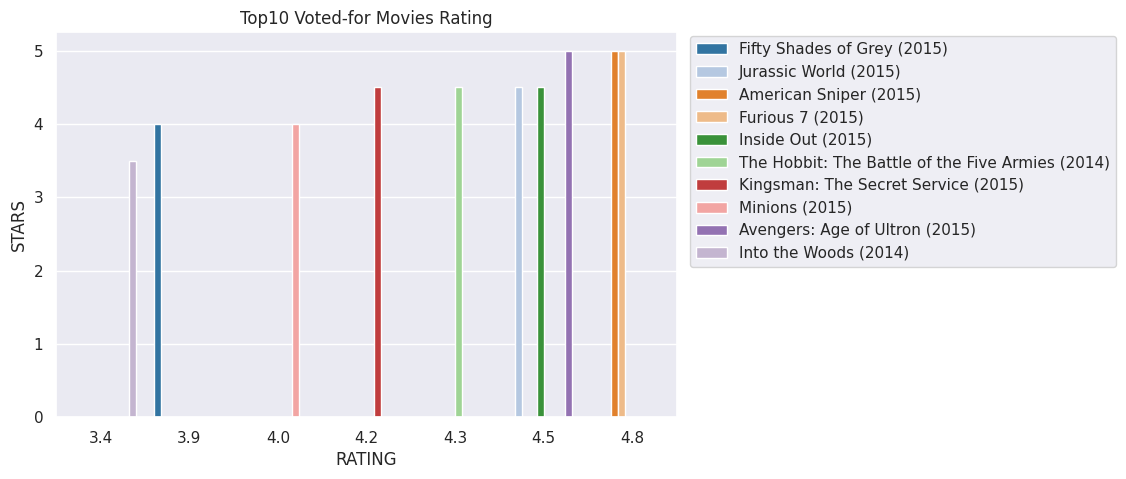

In [45]:
# movies with highest voter count
plt.figure(figsize=(8, 5))
plt.title('Top10 Voted-for Movies Rating')

plot = sns.barplot(
    x='RATING',
    y='STARS',
    data=fandango_df.sort_values(by='VOTES', ascending=False).head(10),
    palette='tab20', hue='FILM' )

plt.legend(bbox_to_anchor=(1.01,1.01))

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_06.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_06.webp)

In [115]:
# how many movies have zero votes
fandango_df[fandango_df['VOTES'] == 0]['FILM'].count()
# 73

73

In [3]:
# remove all 73 movies nobody voted for
fandango_df_non_zero_votes = fandango_df[fandango_df['VOTES'] != 0]
fandango_df_non_zero_votes.sort_values(by='VOTES', ascending=True).head(5)

,FILM,STARS,RATING,VOTES
436,Z For Zachariah (2015),5.0,5.0,1
415,Buggs Bunny (2015),4.0,4.0,1
414,Wild Canaries (2015),3.0,3.0,1
413,The Living (2015),3.0,3.0,1
412,The Face of an Angel (2015),3.0,3.0,1


|  | FILM | STARS | RATING | VOTES | YEAR |
| -- | -- | -- | -- | -- | -- |
| 436 | Z For Zachariah (2015) | 5.0 | 5.0 | 1 | 2015 |
| 415 | Buggs Bunny (2015) | 4.0 | 4.0 | 1 | 2015 |
| 414 | Wild Canaries (2015) | 3.0 | 3.0 | 1 | 2015 |
| 413 | The Living (2015) | 3.0 | 3.0 | 1 | 2015 |
| 412 | The Face of an Angel (2015) | 3.0 | 3.0 | 1 | 2015 |

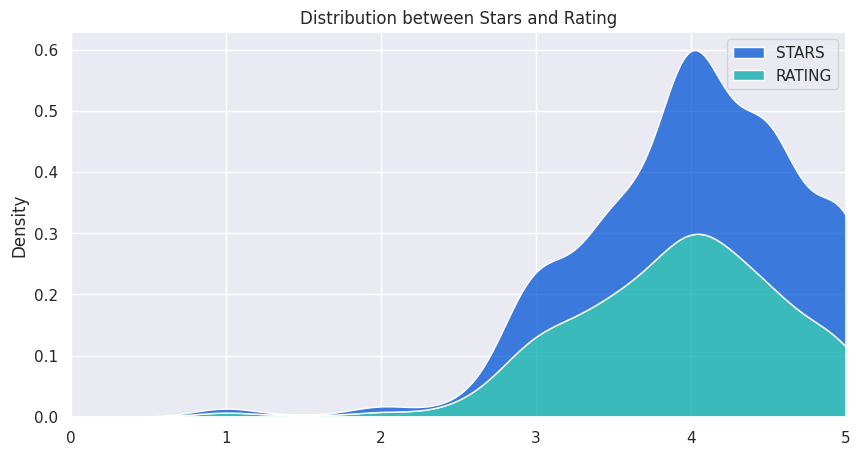

In [47]:
# do ratings and star follow the same distribution?
plt.figure(figsize=(10, 5))
plt.title('Distribution between Stars and Rating')

fandango_df_no_votes = fandango_df_non_zero_votes[['STARS','RATING']]

plot = sns.kdeplot(data=fandango_df_no_votes, multiple="stack", palette='winter')

plot.set_xlim(0,5)

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_07.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_07.webp)

In [51]:
# quantify discrepancy between rating and star rating
fandango_df_no_votes['RATE_STAR_DIFF'] = (
    fandango_df_no_votes['STARS'] - fandango_df_no_votes['RATING']
).round(1)

fandango_df_no_votes[['RATING', 'STARS', 'RATE_STAR_DIFF']].head(10)

/tmp/ipykernel_83797/887485271.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fandango_df_no_votes['RATE_STAR_DIFF'] = (fandango_df_no_votes['STARS'] - fandango_df_no_votes['RATING']).round(1)


,RATING,STARS,RATE_STAR_DIFF
0,3.9,4.0,0.1
1,4.5,4.5,0.0
2,4.8,5.0,0.2
3,4.8,5.0,0.2
4,4.5,4.5,0.0
5,4.3,4.5,0.2
6,4.2,4.5,0.3
7,4.0,4.0,0.0
8,4.5,5.0,0.5
9,3.4,3.5,0.1


|  | RATING | STARS | RATE_STAR_DIFF |
| -- | -- | -- | -- |
| 0 | 3.9 | 4.0 | 0.1 |
| 1 | 4.5 | 4.5 | 0.0 |
| 2 | 4.8 | 5.0 | 0.2 |
| 3 | 4.8 | 5.0 | 0.2 |
| 4 | 4.5 | 4.5 | 0.0 |
| 5 | 4.3 | 4.5 | 0.2 |
| 6 | 4.2 | 4.5 | 0.3 |
| 7 | 4.0 | 4.0 | 0.0 |
| 8 | 4.5 | 5.0 | 0.5 |
| 9 | 3.4 | 3.5 | 0.1 |

In [53]:
# what movie has the greatest deviation
fandango_df_no_votes.sort_values(by='RATE_STAR_DIFF', ascending=False).head(10)

,STARS,RATING,RATE_STAR_DIFF
381,5.0,4.0,1.0
190,5.0,4.5,0.5
161,4.0,3.5,0.5
210,4.5,4.0,0.5
209,4.0,3.5,0.5
200,5.0,4.5,0.5
189,4.5,4.0,0.5
169,5.0,4.5,0.5
122,4.0,3.5,0.5
50,4.0,3.5,0.5


|  | STARS | RATING | RATE_STAR_DIFF |
| -- | -- | -- | -- |
| 381 | 5.0 | 4.0 | 1.0 |
| 190 | 5.0 | 4.5 | 0.5 |
| 161 | 4.0 | 3.5 | 0.5 |
| 210 | 4.5 | 4.0 | 0.5 |
| 209 | 4.0 | 3.5 | 0.5 |
| 200 | 5.0 | 4.5 | 0.5 |
| 189 | 4.5 | 4.0 | 0.5 |
| 169 | 5.0 | 4.5 | 0.5 |
| 122 | 4.0 | 3.5 | 0.5 |
| 50 | 4.0 | 3.5 | 0.5 |

In [56]:
# what is the title of movie `381`
fandango_df.iloc[381]

FILM      Turbo Kid (2015)
STARS                  5.0
RATING                 4.0
VOTES                    2
YEAR                  2015
Name: 381, dtype: object

|  |  |
| -- | -- |
| FILM | Turbo Kid (2015) |
| STARS | 5.0 |
| RATING | 4.0 |
| VOTES | 2 |
| YEAR | 2015 |
_Name: 381, dtype: object_

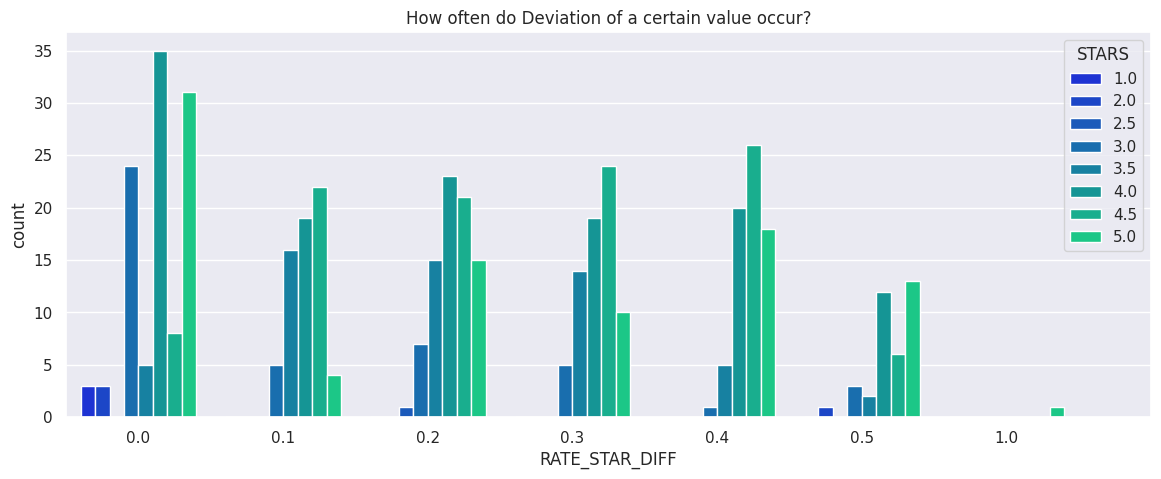

In [58]:
plt.figure(figsize=(14, 5))
plt.title('How often do Deviation of a certain value occur?')

plot = sns.countplot(
    data=fandango_df_no_votes,
    x='RATE_STAR_DIFF',
    hue='STARS',
    palette='winter'
)

plot.set_xticks(np.arange(8))

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_08.webp', bbox_inches='tight')
# there are only positive deviations
# and the sum of movies with positive
# deviations is greater than the number
# of movies with a deviation of zero

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_08.webp)

## Comparing Fandango Star Ratings to other Sites

In [22]:
all_sites_df = pd.read_csv('dataset/fandango_score_comparison.csv')
all_sites_df.head(2).transpose()

,0,1
FILM,Avengers: Age of Ultron (2015),Cinderella (2015)
RottenTomatoes,74,85
RottenTomatoes_User,86,80
Metacritic,66,67
Metacritic_User,7.1,7.5
IMDB,7.8,7.1
Fandango_Stars,5.0,5.0
Fandango_Ratingvalue,4.5,4.5
RT_norm,3.7,4.25
RT_user_norm,4.3,4.0


|  | 0 | 1 |
| -- | -- | -- |
| FILM | Avengers: Age of Ultron (2015) | Cinderella (2015) |
| RottenTomatoes | 74 | 85 |
| RottenTomatoes_User | 86 | 80 |
| Metacritic | 66 | 67 |
| Metacritic_User | 7.1 | 7.5 |
| IMDB | 7.8 | 7.1 |
| Fandango_Stars | 5.0 | 5.0 |
| Fandango_Ratingvalue | 4.5 | 4.5 |
| RT_norm | 3.7 | 4.25 |
| RT_user_norm | 4.3 | 4.0 |
| Metacritic_norm | 3.3 | 3.35 |
| Metacritic_user_nom | 3.55 | 3.75 |
| IMDB_norm | 3.9 | 3.55 |
| RT_norm_round | 3.5 | 4.5 |
| RT_user_norm_round | 4.5 | 4.0 |
| Metacritic_norm_round | 3.5 | 3.5 |
| Metacritic_user_norm_round | 3.5 | 4.0 |
| IMDB_norm_round | 4.0 | 3.5 |
| Metacritic_user_vote_count | 1330 | 249 |
| IMDB_user_vote_count | 271107 | 65709 |
| Fandango_votes | 14846 | 12640 |
| Fandango_Difference | 0.5 | 0.5 |

### Rotten Tomatoes

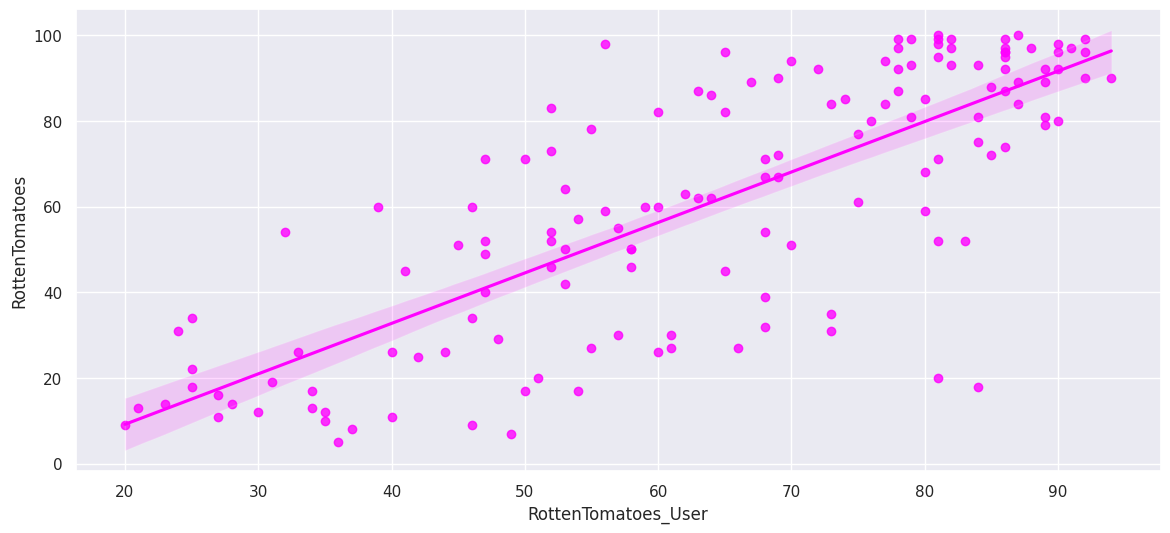

In [116]:
plt.figure(figsize=(14, 6))

sns.regplot(
    x='RottenTomatoes_User',
    y='RottenTomatoes',
    data=all_sites_df,
    ci=95,
    n_boot=1000,
    color='fuchsia'
)

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_09a.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_09a.webp)

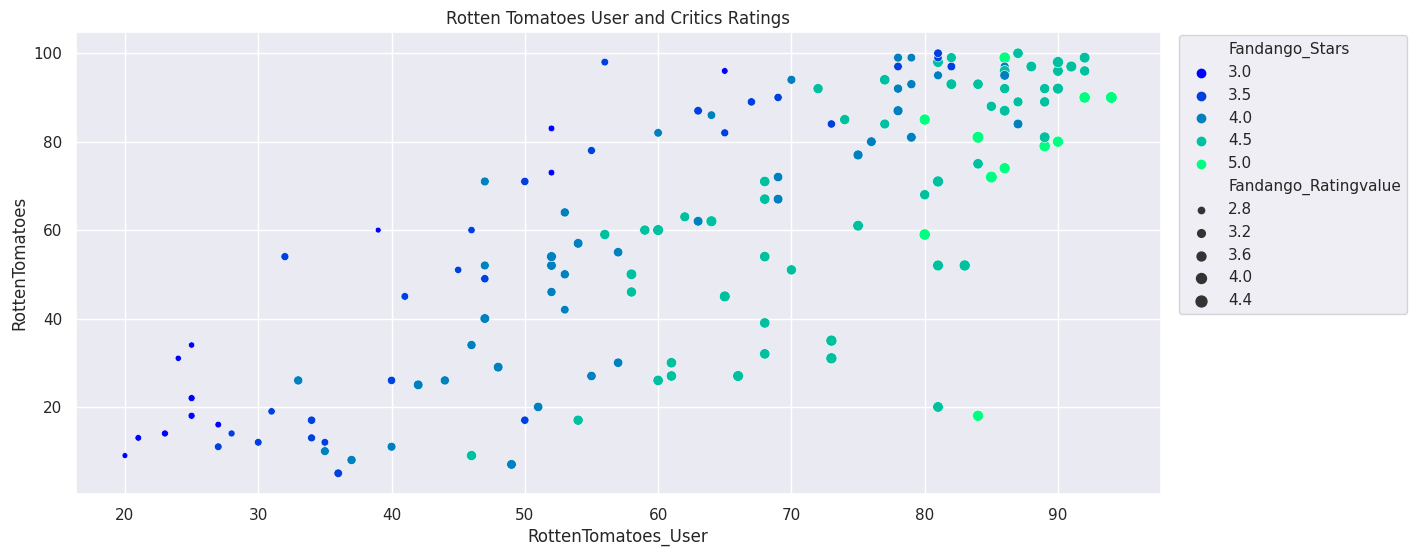

In [118]:
plt.figure(figsize=(14, 6))

sns.scatterplot(
    x='RottenTomatoes_User',
    y='RottenTomatoes',
    data=all_sites_df,
    hue='Fandango_Stars',
    palette='winter',
    size='Fandango_Ratingvalue'
).set_title('Rotten Tomatoes User and Critics Ratings')

plt.legend(bbox_to_anchor=(1.01,1.01))
plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_09b.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_09b.webp)

In [119]:
# quantify discrepancy between critics and user rating
all_sites_df['RottenTomatoes_Critic_User_Diff'] = (
    all_sites_df['RottenTomatoes'] - all_sites_df['RottenTomatoes_User']
).round(1)

all_sites_df[
    ['RottenTomatoes_Critic_User_Diff', 'RottenTomatoes', 'RottenTomatoes_User']
].head(10)

,RottenTomatoes_Critic_User_Diff,RottenTomatoes,RottenTomatoes_User
0,-12,74,86
1,5,85,80
2,-10,80,90
3,-66,18,84
4,-14,14,28
5,1,63,62
6,-11,42,53
7,22,86,64
8,17,99,82
9,2,89,87


|  | RottenTomatoes_Critic_User_Diff | RottenTomatoes | RottenTomatoes_User |
| -- | -- | -- | -- |
| 0 | -12 | 74 | 86 |
| 1 | 5 | 85 | 80 |
| 2 | -10 | 80 | 90 |
| 3 | -66 | 18 | 84 |
| 4 | -14 | 14 | 28 |
| 5 | 1 | 63 | 62 |
| 6 | -11 | 42 | 53 |
| 7 | 22 | 86 | 64 |
| 8 | 17 | 99 | 82 |
| 9 | 2 | 89 | 87 |

In [120]:
# what is the average absolute deviation between user and critic scores?
all_sites_df['RottenTomatoes_Critic_User_Diff'].apply(abs).mean()
# 15.095890410958905

15.095890410958905

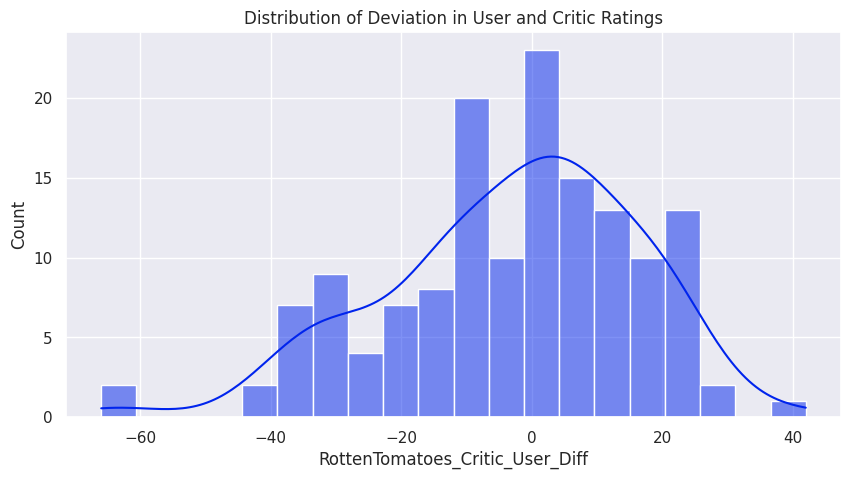

In [124]:
plt.figure(figsize=(10, 5))
plt.title('Distribution of Deviation in User and Critic Ratings')

sns.histplot(
    data=all_sites_df,
    x='RottenTomatoes_Critic_User_Diff',
    bins=20,
    kde=True
)

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_09c.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_09c.webp)

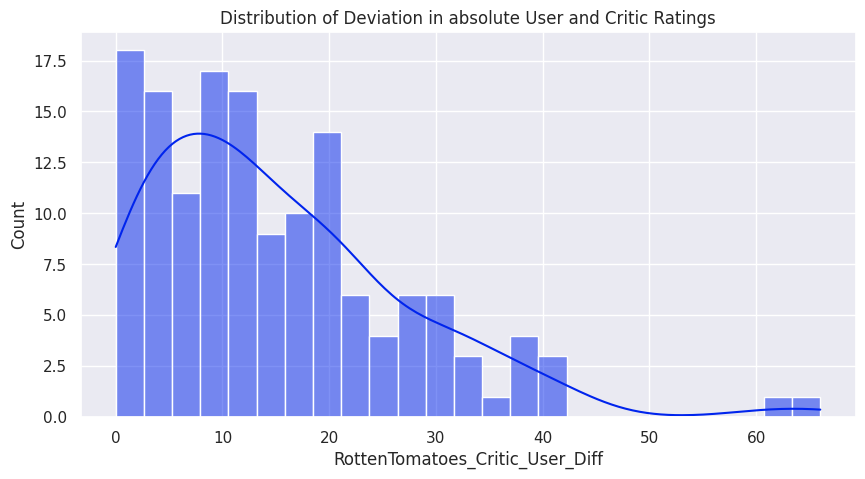

In [126]:
plt.figure(figsize=(10, 5))
plt.title('Distribution of Deviation in absolute User and Critic Ratings')

sns.histplot(
    x=all_sites_df['RottenTomatoes_Critic_User_Diff'].apply(abs),
    bins=25,
    kde=True
)

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_09d.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_09d.webp)

In [127]:
# what movies have the largest neg difference in critics - user?
all_sites_df.sort_values(
    by='RottenTomatoes_Critic_User_Diff',
    ascending=True)[
    ['FILM','RottenTomatoes_Critic_User_Diff']
].head(10)

,FILM,RottenTomatoes_Critic_User_Diff
3,Do You Believe? (2015),-66
85,Little Boy (2015),-61
134,The Longest Ride (2015),-42
105,Hitman: Agent 47 (2015),-42
125,The Wedding Ringer (2015),-39
132,Max (2015),-38
19,Pixels (2015),-37
15,Taken 3 (2015),-37
51,Entourage (2015),-36
49,Terminator Genisys (2015),-34


* Movies loved by RT Users but disliked by Critics:
|  | FILM | RottenTomatoes_Critic_User_Diff |
| -- | -- | -- |
| 3 | Do You Believe? (2015) | -66 |
| 85 | Little Boy (2015) | -61 |
| 134 | The Longest Ride (2015) | -42 |
| 105 | Hitman: Agent 47 (2015) | -42 |
| 125 | The Wedding Ringer (2015) | -39 |
| 132 | Max (2015) | -38 |
| 19 | Pixels (2015) | -37 |
| 15 | Taken 3 (2015) | -37 |
| 51 | Entourage (2015) | -36 |
| 49 | Terminator Genisys (2015) | -34 |

In [102]:
# what movies have the largest pos difference in critics - user?
all_sites_df.sort_values(by='RottenTomatoes_Critic_User_Diff', ascending=False)[['FILM','RottenTomatoes_Critic_User_Diff']].head(10)

,FILM,RottenTomatoes_Critic_User_Diff
69,Mr. Turner (2014),42
112,It Follows (2015),31
115,While We're Young (2015),31
145,"Kumiko, The Treasure Hunter (2015)",24
37,Welcome to Me (2015),24
40,I'll See You In My Dreams (2015),24
90,The SpongeBob Movie: Sponge Out of Water (2015),23
7,Top Five (2014),22
11,Black Sea (2015),22
116,Clouds of Sils Maria (2015),22


* Movies loved by Critics but disliked by RT Users:

|  | FILM | RottenTomatoes_Critic_User_Diff |
| -- | -- | -- |
| 69 | Mr. Turner (2014) | 42 |
| 112 | It Follows (2015) | 31 |
| 115 | While We're Young (2015) | 31 |
| 145 | Kumiko, The Treasure Hunter (2015) | 24 |
| 37 | Welcome to Me (2015) | 24 |
| 40 | I'll See You In My Dreams (2015) | 24 |
| 90 | The SpongeBob Movie: Sponge Out of Water (2015) | 23 |
| 7 | Top Five (2014) | 22 |
| 11 | Black Sea (2015) | 22 |
| 116 | Clouds of Sils Maria (2015) | 22 |

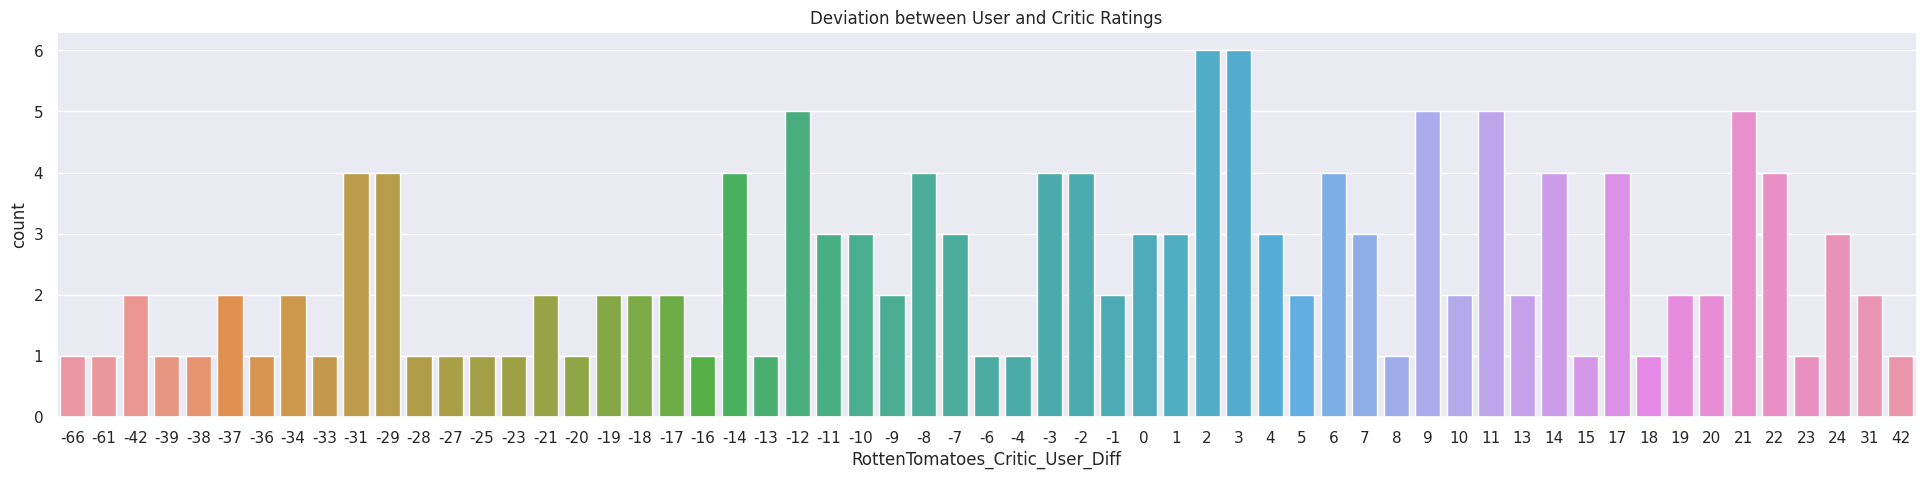

In [103]:
plt.figure(figsize=(24, 5))
plt.title('Deviation between User and Critic Ratings')

plot = sns.countplot(
    data=all_sites_df,
    x='RottenTomatoes_Critic_User_Diff'
)

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_10.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_10.webp)

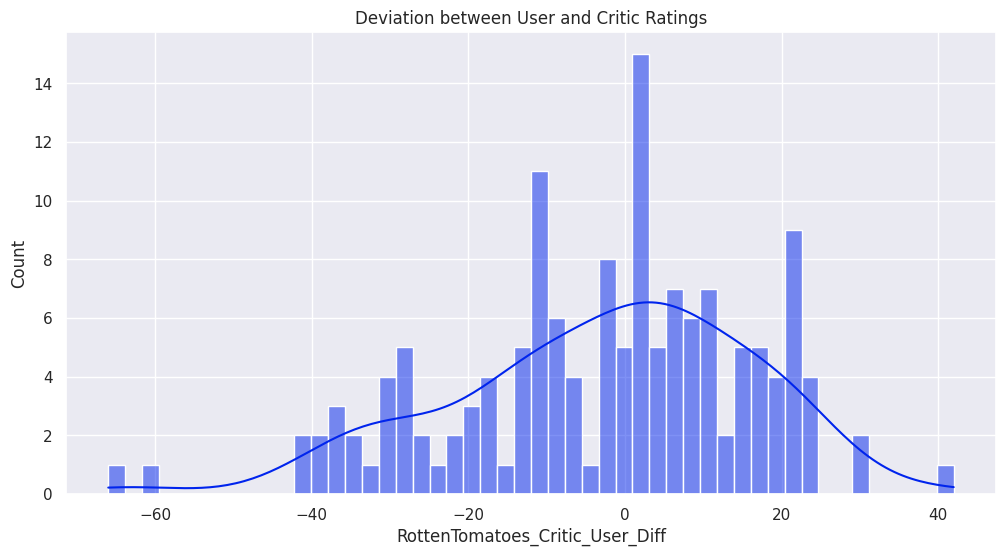

In [128]:
plt.figure(figsize=(12, 6))
plt.title('Deviation between User and Critic Ratings')

plot = sns.histplot(
    data=all_sites_df,
    bins=50,
    x='RottenTomatoes_Critic_User_Diff',
    kde=True
)

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_11.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_11.webp)

### MetaCritic

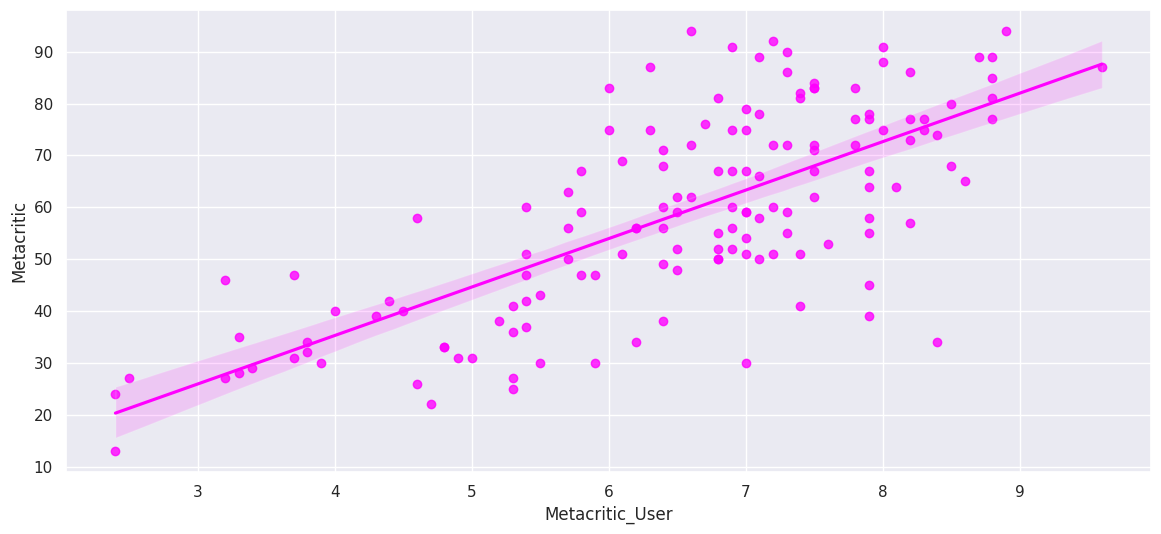

In [15]:
plt.figure(figsize=(14, 6))

sns.regplot(
    x='Metacritic_User',
    y='Metacritic',
    data=all_sites_df,
    ci=95,
    n_boot=1000,
    color='fuchsia'
)

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_12a.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_12a.webp)

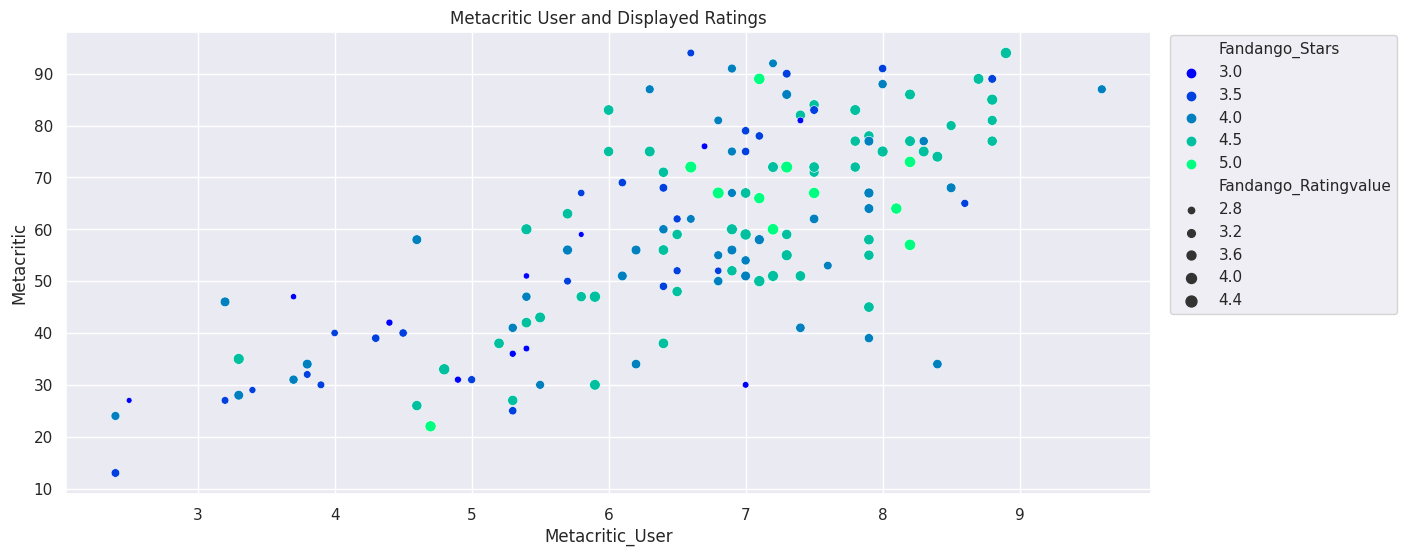

In [8]:
plt.figure(figsize=(14, 6))

sns.scatterplot(
    x='Metacritic_User',
    y='Metacritic',
    data=all_sites_df,
    hue='Fandango_Stars',
    palette='winter',
    size='Fandango_Ratingvalue'
).set_title('Metacritic User and Displayed Ratings')

plt.legend(bbox_to_anchor=(1.01,1.01))
plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_12b.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_12b.webp)

### IMDB

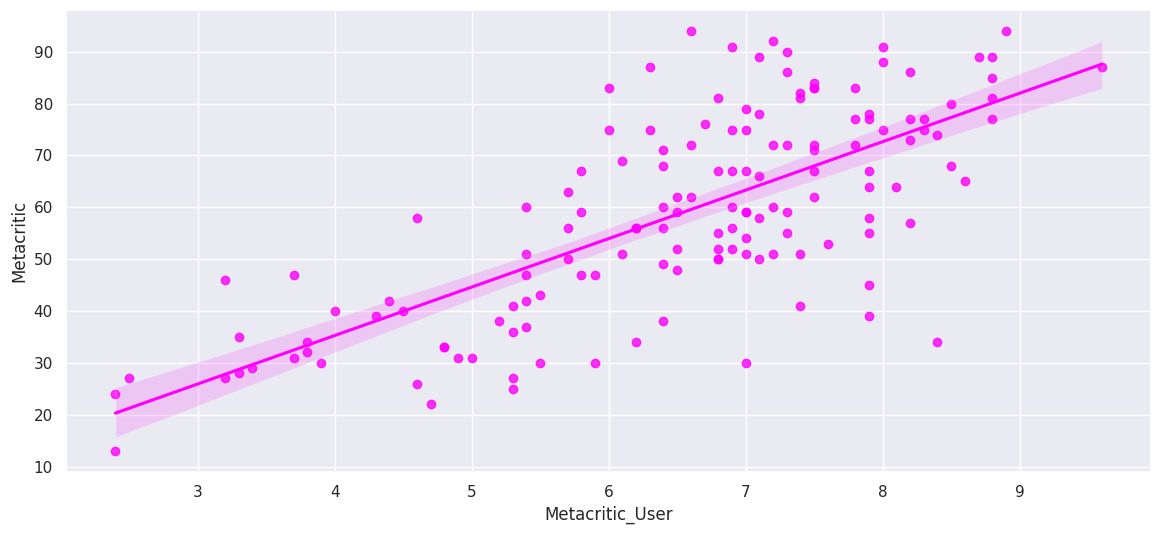

In [14]:
plt.figure(figsize=(14, 6))

sns.regplot(
    x='Metacritic_User',
    y='Metacritic',
    data=all_sites_df,
    ci=95,
    n_boot=1000,
    color='fuchsia'
)

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_13a.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_13a.webp)

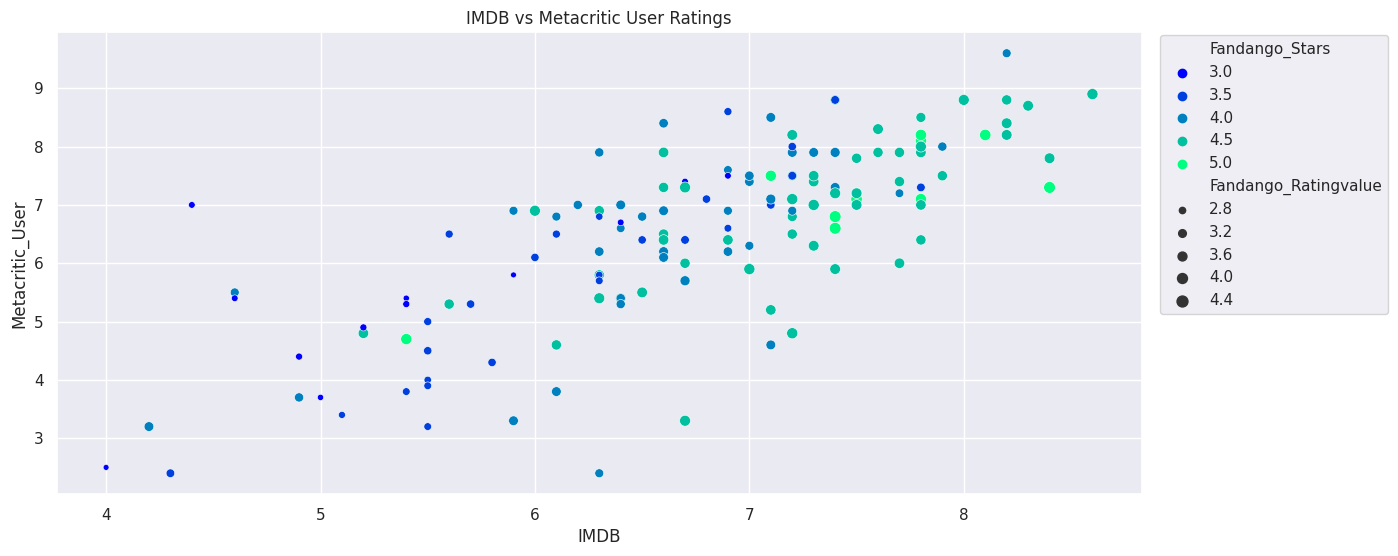

In [12]:
plt.figure(figsize=(14, 6))

sns.scatterplot(
    x='IMDB',
    y='Metacritic_User',
    data=all_sites_df,
    hue='Fandango_Stars',
    palette='winter',
    size='Fandango_Ratingvalue'
).set_title('IMDB vs Metacritic User Ratings')

plt.legend(bbox_to_anchor=(1.01,1.01))
plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_13b.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_13b.webp)

### Normalizing the Datasets

In [19]:
all_sites_df.describe()
# Rotten Tomatoes: 0-100
# Rotten Tomatoes Users: 0-100
# Metacritic: 0-100
# Metacritic User: 0-10
# IMDB: 0-10
# Fandango Stars: 0-5
# Fandango Rating: 0-5

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


|  | RottenTomatoes | RottenTomatoes_User | Metacritic | Metacritic_User | IMDB | Fandango_Stars | Fandango_Ratingvalue |
| -- | -- | -- | -- | -- | -- | -- | -- |
| count | 146.000000 | 146.000000 | 146.000000 | 146.000000 | 146.000000 | 146.000000 | 146.000000 |
| mean | 60.849315 | 63.876712 | 58.808219 | 6.519178 | 6.736986 | 4.089041 | 3.845205 |
| std | 30.168799 | 20.024430 | 19.517389 | 1.510712 | 0.958736 | 0.540386 | 0.502831 |
| min | 5.000000 | 20.000000 | 13.000000 | 2.400000 | 4.000000 | 3.000000 | 2.700000 |
| 25% | 31.250000 | 50.000000 | 43.500000 | 5.700000 | 6.300000 | 3.500000 | 3.500000 |
| 50% | 63.500000 | 66.500000 | 59.000000 | 6.850000 | 6.900000 | 4.000000 | 3.900000 |
| 75% | 89.000000 | 81.000000 | 75.000000 | 7.500000 | 7.400000 | 4.500000 | 4.200000 |
| max | 100.000000 | 94.000000 | 94.000000 | 9.600000 | 8.600000 | 5.000000 | 4.800000 |

In [30]:
# Normalized to the Fandango 0-5 rating system
all_sites_df['RottenTomatoes_Normalized'] = (all_sites_df['RottenTomatoes'] / 20).round(2)
all_sites_df['RottenTomatoes_User_Normalized'] = (all_sites_df['RottenTomatoes_User'] / 20).round(2)
all_sites_df['Metacritic_Normalized'] = (all_sites_df['Metacritic'] / 20).round(2)
all_sites_df['Metacritic_User_Normalized'] = (all_sites_df['Metacritic_User'] / 2).round(2)
all_sites_df['IMDB_Normalized'] = (all_sites_df['IMDB'] / 2).round(2)

In [41]:
all_sites_normed_ratings_df = all_sites_df[[
    'RottenTomatoes_Normalized',
    'RottenTomatoes_User_Normalized',
    'Metacritic_Normalized',
    'Metacritic_User_Normalized',
    'IMDB_Normalized',
    'Fandango_Stars',
    'Fandango_Ratingvalue'
    
]]

all_sites_normed_ratings_df.head(1).T

,0
RottenTomatoes_Normalized,3.70
RottenTomatoes_User_Normalized,4.30
Metacritic_Normalized,3.30
Metacritic_User_Normalized,3.55
IMDB_Normalized,3.90
Fandango_Stars,5.00
Fandango_Ratingvalue,4.50


|    | 0 |
| -- | -- |
| RottenTomatoes_Normalized | 3.70 |
| RottenTomatoes_User_Normalized | 4.30 |
| Metacritic_Normalized | 3.30 |
| Metacritic_User_Normalized | 3.55 |
| IMDB_Normalized | 3.90 |
| Fandango_Stars | 5.00 |
| Fandango_Ratingvalue | 4.50 |

In [137]:
# move legend in kdeplot
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

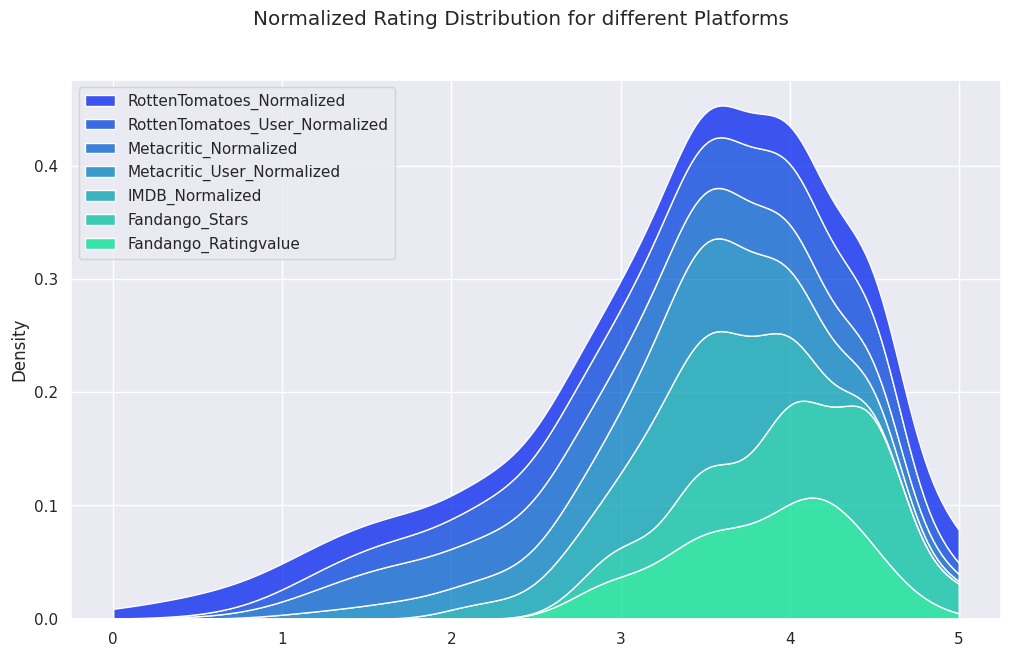

In [150]:
# do all the ratings follow the same distribution?
fig, ax = plt.subplots(figsize=(12, 7))
fig.suptitle('Normalized Rating Distribution for different Platforms')

plot = sns.kdeplot(
    data=all_sites_normed_ratings_df,
    multiple='stack',
    palette='winter',
    clip=[0,5]
)

move_legend(ax, "upper left")
plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_14.webp', bbox_inches='tight')
# the fandango distribution leans towards higher ratings

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_14.webp)

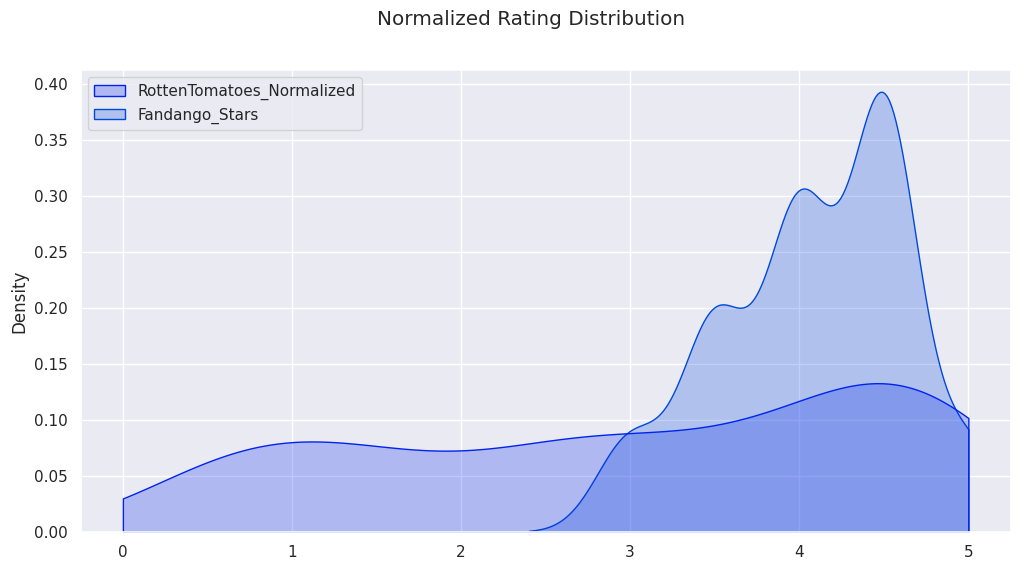

In [158]:
fig, ax = plt.subplots(figsize=(12,6))
sns.kdeplot(
    clip=[0,5],
    fill=True,
    data=all_sites_normed_ratings_df[
        ['RottenTomatoes_Normalized','Fandango_Stars']
    ]    
)

fig.suptitle('Normalized Rating Distribution')

move_legend(ax, "upper left")
plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_15.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_15.webp)

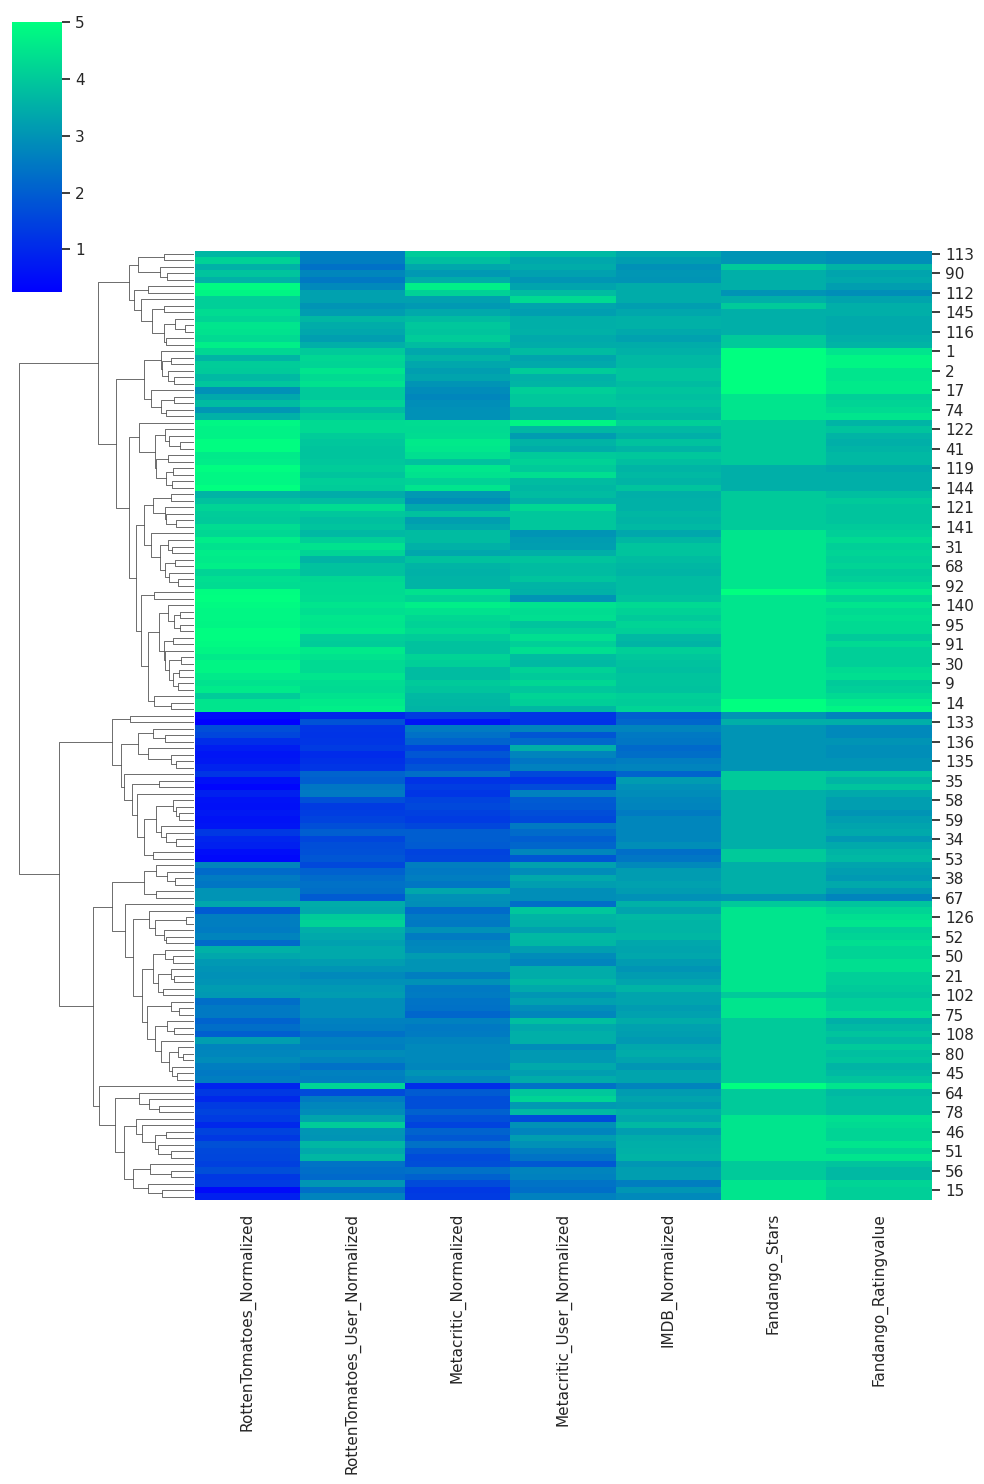

In [159]:
sns.clustermap(
    all_sites_normed_ratings_df,
    figsize=(10, 15),
    cmap='winter',
    annot=False,
    col_cluster=False
)

plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_16.webp', bbox_inches='tight')
# the clustermap groups movies together by rating. the fandango ratings in the lower right are
# all higher (green instead of a blue hue) compared to the rest of the ratings from other platforms

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_16.webp)

In [160]:
# compare the top10 worst rated movies
worts_10_df = all_sites_normed_ratings_df.sort_values(
    by='Fandango_Stars', ascending=False
).tail(10)

worts_10_df

,RottenTomatoes_Normalized,RottenTomatoes_User_Normalized,Metacritic_Normalized,Metacritic_User_Normalized,IMDB_Normalized,Fandango_Stars,Fandango_Ratingvalue
67,3.00,1.95,2.95,2.90,2.95,3.0,2.7
101,0.80,1.35,1.50,3.50,2.20,3.0,2.9
136,1.10,1.25,2.10,2.20,2.45,3.0,3.0
135,0.70,1.15,1.55,2.45,2.60,3.0,3.0
115,4.15,2.60,3.80,3.35,3.20,3.0,2.9
107,0.65,1.05,1.85,2.70,2.30,3.0,2.9
112,4.80,3.25,4.15,3.75,3.45,3.0,2.9
113,3.65,2.60,4.05,3.70,3.35,3.0,2.9
48,0.45,1.00,1.35,1.25,2.00,3.0,2.7
82,1.70,1.25,2.55,2.70,2.70,3.0,2.8


|  | RottenTomatoes_Normalized | RottenTomatoes_User_Normalized | Metacritic_Normalized | Metacritic_User_Normalized | IMDB_Normalized | Fandango_Stars | Fandango_Ratingvalue |
| -- | -- | -- | -- | -- | -- | -- | -- |
| 67 | 3.00 | 1.95 | 2.95 | 2.90 | 2.95 | 3.0 | 2.7 |
| 101 | 0.80 | 1.35 | 1.50 | 3.50 | 2.20 | 3.0 | 2.9 |
| 136 | 1.10 | 1.25 | 2.10 | 2.20 | 2.45 | 3.0 | 3.0 |
| 135 | 0.70 | 1.15 | 1.55 | 2.45 | 2.60 | 3.0 | 3.0 |
| 115 | 4.15 | 2.60 | 3.80 | 3.35 | 3.20 | 3.0 | 2.9 |
| 107 | 0.65 | 1.05 | 1.85 | 2.70 | 2.30 | 3.0 | 2.9 |
| 112 | 4.80 | 3.25 | 4.15 | 3.75 | 3.45 | 3.0 | 2.9 |
| 113 | 3.65 | 2.60 | 4.05 | 3.70 | 3.35 | 3.0 | 2.9 |
| 48 | 0.45 | 1.00 | 1.35 | 1.25 | 2.00 | 3.0 | 2.7 |
| 82 | 1.70 | 1.25 | 2.55 | 2.70 | 2.70 | 3.0 | 2.8 |

In [68]:
# get movie names
all_sites_df[
    ['FILM','Fandango_Stars','RottenTomatoes_User']
].iloc[
    [67, 101, 136, 135, 115, 107, 112, 113, 48, 82]
]

,FILM,Fandango_Stars,RottenTomatoes_User
67,Unfriended (2015),3.0,39
101,The Gallows (2015),3.0,27
136,The Woman In Black 2 Angel of Death (2015),3.0,25
135,The Lazarus Effect (2015),3.0,23
115,While We're Young (2015),3.0,52
107,The Vatican Tapes (2015),3.0,21
112,It Follows (2015),3.0,65
113,Inherent Vice (2014),3.0,52
48,Fantastic Four (2015),3.0,20
82,Blackhat (2015),3.0,25


|    | FILM | Fandango_Stars | RottenTomatoes_User |
| -- | -- | -- | -- |
| 67 | Unfriended (2015) | 3.0 | 39 |
| 101 | The Gallows (2015) | 3.0 | 27 |
| 136 | The Woman In Black 2 Angel of Death (2015) | 3.0 | 25 |
| 135 | The Lazarus Effect (2015) | 3.0 | 23 |
| 115 | While We're Young (2015) | 3.0 | 52 |
| 107 | The Vatican Tapes (2015) | 3.0 | 21 |
| 112 | It Follows (2015) | 3.0 | 65 |
| 113 | Inherent Vice (2014) | 3.0 | 52 |
| 48 | Fantastic Four (2015) | 3.0 | 20 |
| 82 | Blackhat (2015) | 3.0 | 25 |

/tmp/ipykernel_22971/1880265112.py:40: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


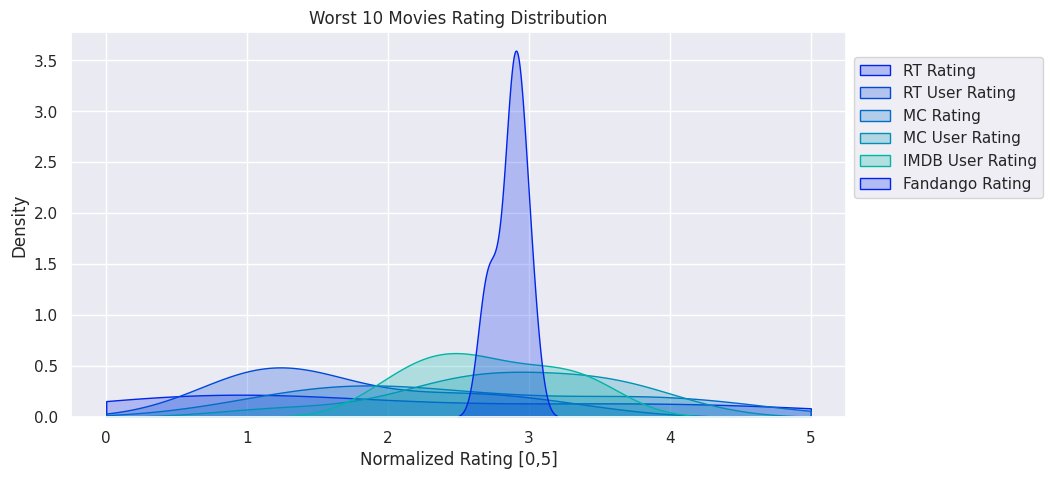

In [163]:
# do ratings and star follow the same distribution?
plt.figure(figsize=(10, 5))
plt.title('Worst 10 Movies Rating Distribution')

sns.kdeplot(
    data=worts_10_df,
    x='RottenTomatoes_Normalized',
    clip=[0,5],
    fill=True,
    label='RT Rating'
)
sns.kdeplot(
    data=worts_10_df,
    x='RottenTomatoes_User_Normalized',
    clip=[0,5],
    fill=True,
    label='RT User Rating'
)
sns.kdeplot(
    data=worts_10_df,
    x='Metacritic_Normalized',
    clip=[0,5],
    fill=True,
    label='MC Rating'
)
sns.kdeplot(
    data=worts_10_df,
    x='Metacritic_User_Normalized',
    clip=[0,5],
    fill=True,
    label='MC User Rating'
)
sns.kdeplot(
    data=worts_10_df,
    x='IMDB_Normalized',
    clip=[0,5],
    fill=True,
    label='IMDB User Rating'
)
sns.kdeplot(
    data=worts_10_df,
    x='Fandango_Stars',
    clip=[0,5],
    fill=True,
    label='Fandango Stars'
)
sns.kdeplot(
    data=worts_10_df,
    x='Fandango_Ratingvalue',
    clip=[0,5],
    fill=True,
    label='Fandango Rating'
)

plt.legend(loc=(1.01, 0.57))
plt.xlabel('Normalized Rating [0,5]')
plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_18.webp', bbox_inches='tight')

# fandango groups all movies with ratings below 3 in the 3-star category

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_18.webp)

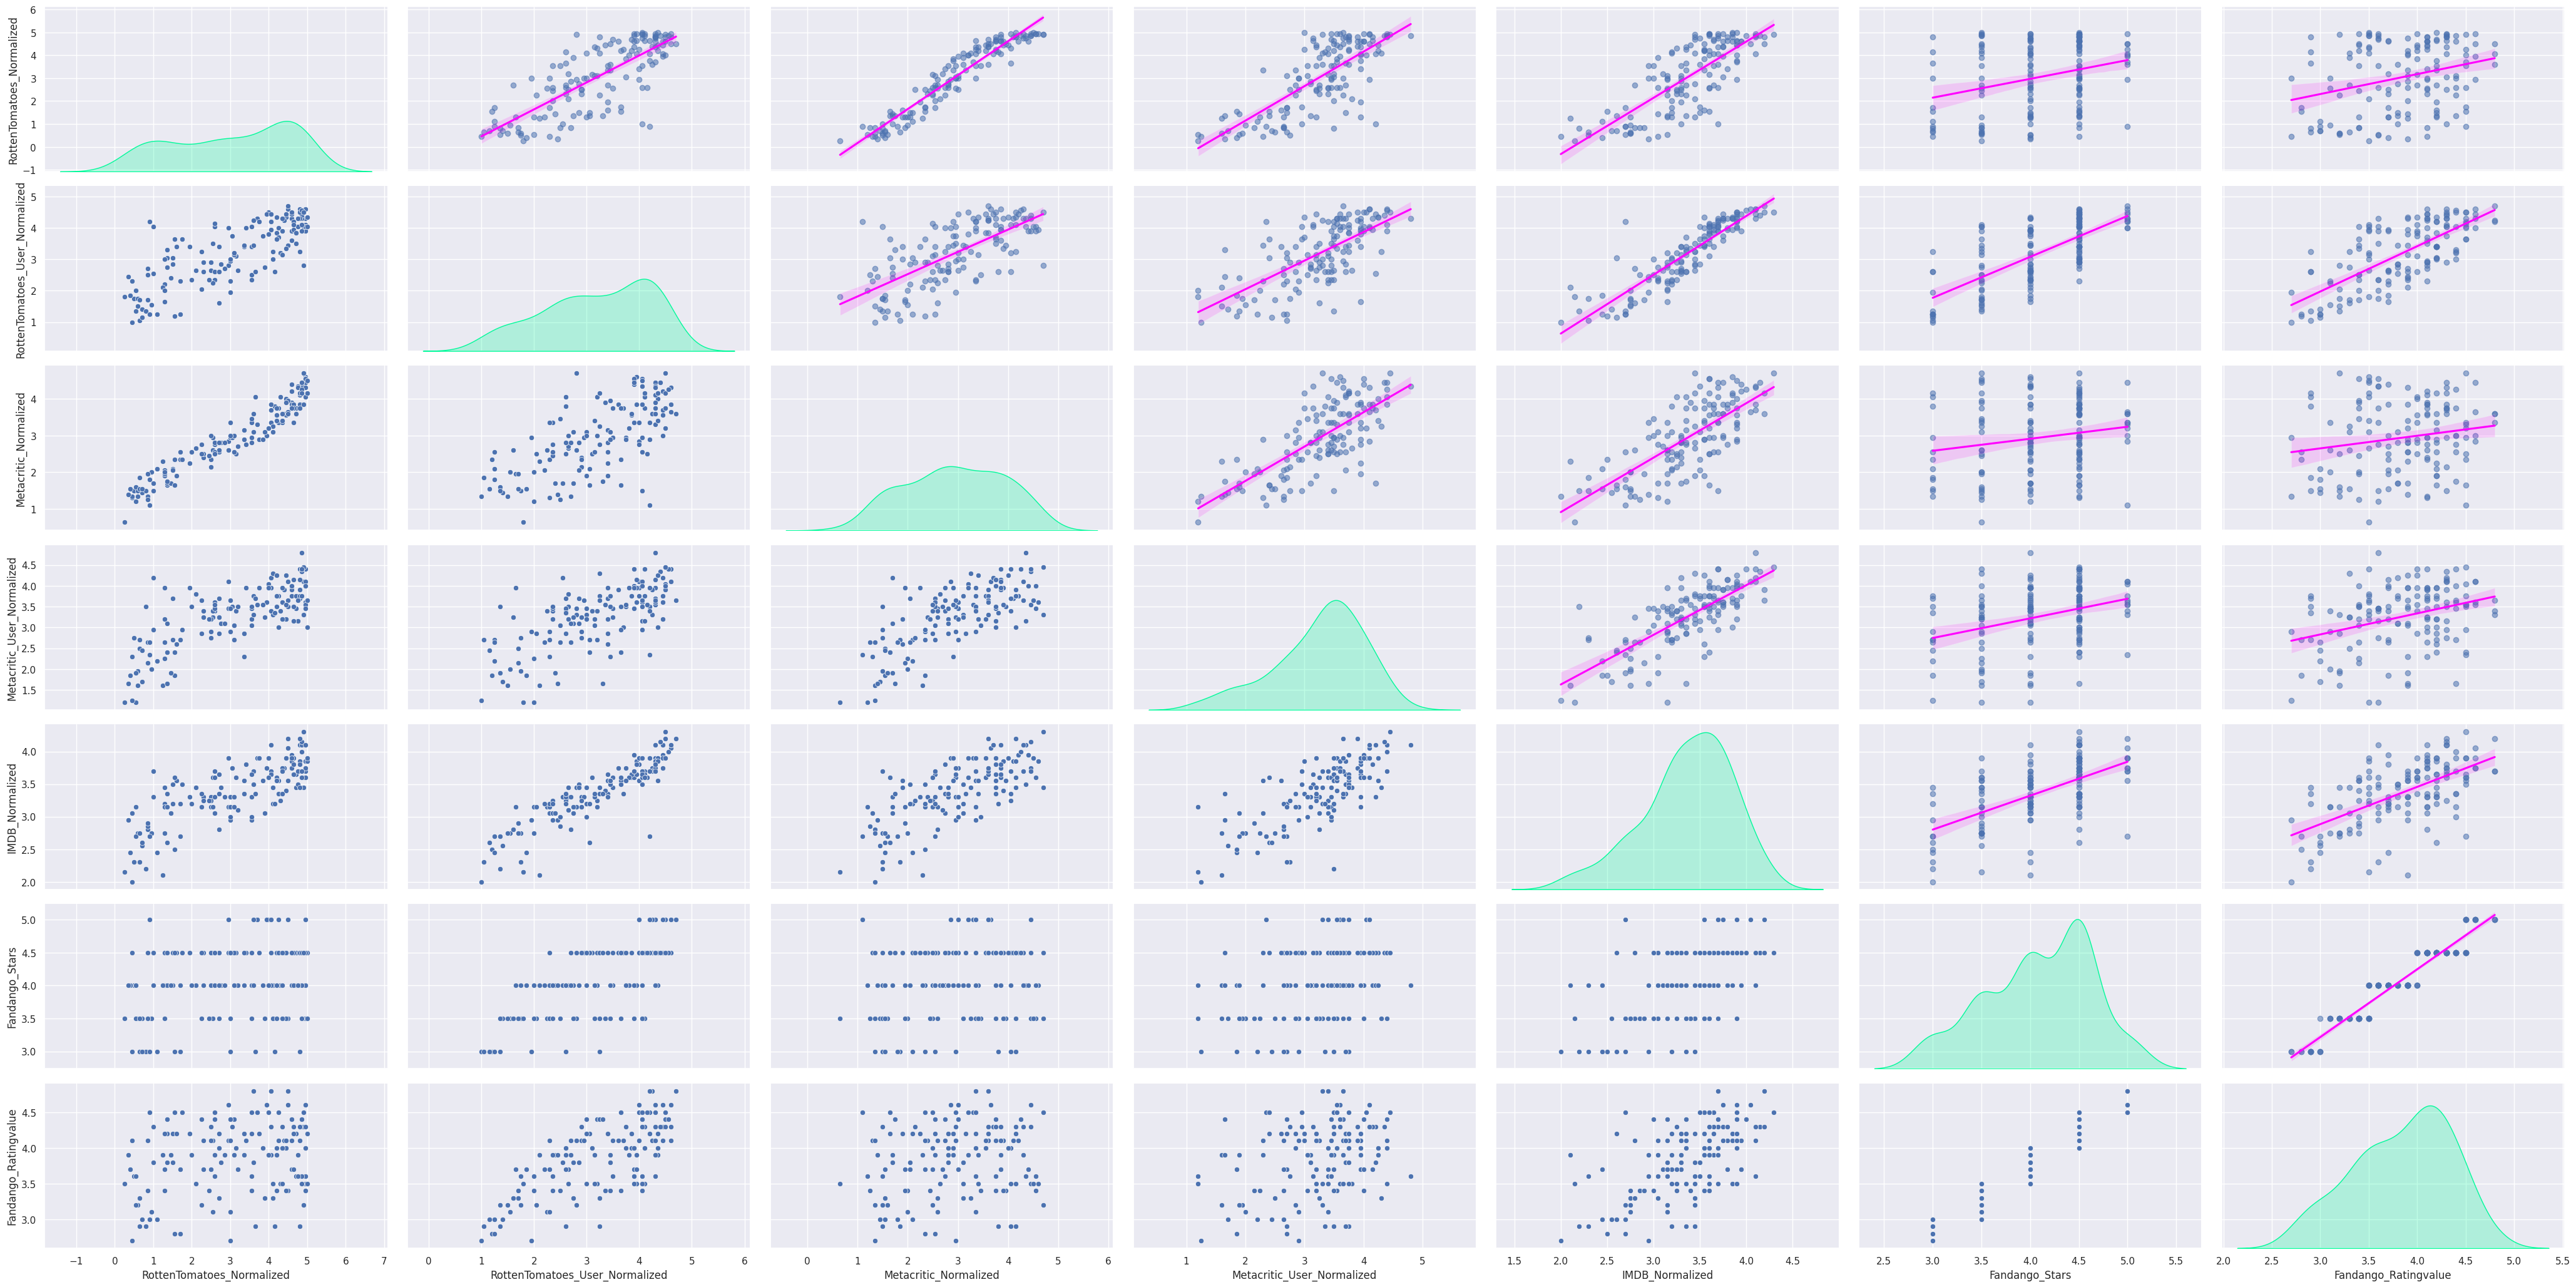

In [89]:
grid = sns.PairGrid(
    data=all_sites_normed_ratings_df,
    height=3,
    aspect=2,
    despine=True
)

grid = grid.map_upper(
    sns.regplot,
    scatter_kws={'alpha':0.55},
    line_kws={'color': 'fuchsia'}
)
grid = grid.map_lower(sns.scatterplot)
grid = grid.map_diag(sns.kdeplot, color='mediumspringgreen', fill=True)


plt.savefig('assets/FiveThirtyEight_Fandango_Dataset_17.webp', bbox_inches='tight')

![FiveThirtyEight Fandango Dataset](assets/FiveThirtyEight_Fandango_Dataset_17.webp)